In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


# SIMPLEST AUTOENCODER

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# The dataset have images with 28x28 pixels
# Normalize all values between 0 and 1

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('X_train shape: ', x_train.shape)
print('X_test shape: ', x_test.shape)

In [ ]:
#Size our encoded representations
encoding_dim = 32

#Input
input_img = Input(shape = (784,))
#Encode
encoded = Dense(encoding_dim, activation='relu')(input_img)
#Decode
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder_simplest = Model(input_img, decoded) 

############################################
# ENCODER MODEL
############################################

encoder_simplest = Model(input_img, encoded) 

############################################
# DECODER MODEL
############################################

encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder_simplest.layers[-1]
# create the decoder model
decoder_simplest = Model(encoded_input, decoder_layer(encoded_input))

############################################
autoencoder_simplest.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder_simplest.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = encoder_simplest.predict(x_test)
decoded_imgs = decoder_simplest.predict(encoded_imgs)

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('./Result_mnist/1-simplest_autoencoder_MEAN_' + str(decoded_imgs.mean())[:4]+'.jpg')
plt.show()

# SPARSITY CONSTRAINT

In [ ]:
#Size our encoded representations
encoding_dim = 32

#Input
input_img = Input(shape = (784,))
#Encode
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
#Decode
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder_sparsity = Model(input_img, decoded)

############################################
autoencoder_sparsity.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

# The dataset have images with 28x28 pixels
# Normalize all values between 0 and 1

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('X_train shape: ', x_train.shape)
print('X_test shape: ', x_test.shape)

In [ ]:
autoencoder_sparsity.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
# encoded_imgs = encoder_sparsity.predict(x_test)
# decoded_imgs = decoder_sparsity.predict(encoded_imgs)

predicted_imgs_sparsity = autoencoder_sparsity.predict(x_test)

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_imgs_sparsity[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('./Result_mnist/2-sparsity_autoencoder_MEAN_' + str(predicted_imgs_sparsity.mean())[:4]+'.jpg')
plt.show()

# DEEP AUTOENCODER

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder_deep = Model(input_img, decoded)
autoencoder_deep.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder_deep.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
predicted_imgs_deep = autoencoder_deep.predict(x_test)

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_imgs_deep[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('./Result_mnist/3-deep_autoencoder_MEAN_' + str(predicted_imgs_deep.mean())[:4]+'.jpg')
plt.show()

# CONVOLUTIONAL AUTOENCODER

In [2]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional (4*4*8())

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv = Model(input_img, decoded)
autoencoder_conv.summary()
autoencoder_conv.compile(optimizer='adadelta', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [36]:
(x_train, _), (x_test, _) = mnist.load_data()

print(x_train.shape)
#Normalize every image between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#Reshape to (nºsamples, 28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

(60000, 28, 28)


In [37]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [4]:
print('X_train shape', x_train.shape)
print('X_test shape', x_test.shape)

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)


In [5]:
from keras.callbacks import TensorBoard
from time import time

autoencoder_conv.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir="log/")])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.2383 - val_loss: 0.1826
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.1660 - val_loss: 0.1544
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.1490 - val_loss: 0.1399
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.1394 - val_loss: 0.1325
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.1326 - val_loss: 0.1265
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.1277 - val_loss: 0.1232
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.1240 - val_loss: 0.1222
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.1215 - val_loss: 0.1192
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1194 - val_loss: 0.1184
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1177 - val_loss: 0.1140

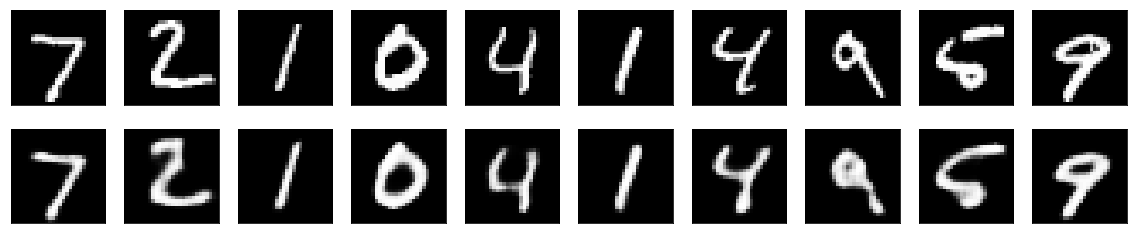

In [22]:
decoded_imgs = autoencoder_conv.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('./Result_mnist/4-conv_autoencoder_MEAN_' + str(decoded_imgs.mean())[:4]+'.jpg')
plt.show()

# DENOISING IMAGES

### Learn to recover the original digits, inserting the noisy images

In [30]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print('X_train shape: ', x_train_noisy.shape)
print('X_test shape: ', x_test_noisy.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


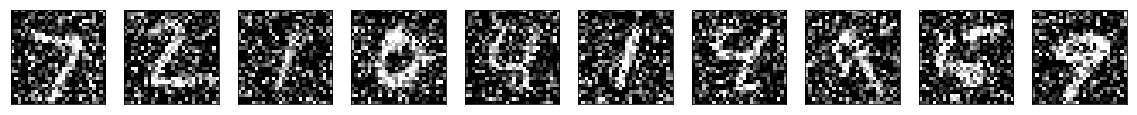

In [31]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder_noisy.summary()
autoencoder_noisy = Model(input_img, decoded)
autoencoder_noisy.compile(optimizer='adadelta', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [33]:
autoencoder_noisy.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='log/', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s - loss: 0.1990 - val_loss: 0.1332
Epoch 2/100
60000/60000 [==============================] - 4s - loss: 0.1232 - val_loss: 0.1152
Epoch 3/100
60000/60000 [==============================] - 4s - loss: 0.1143 - val_loss: 0.1117
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.1097 - val_loss: 0.1084
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.1070 - val_loss: 0.1047
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.1053 - val_loss: 0.1031
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.1041 - val_loss: 0.1024
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.1033 - val_loss: 0.1044
Epoch 9/100
60000/60000 [==============================] - 5s - loss: 0.1026 - val_loss: 0.1012
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.1018 - val_lo

60000/60000 [==============================] - 5s - loss: 0.0943 - val_loss: 0.0940
Epoch 85/100
60000/60000 [==============================] - 5s - loss: 0.0943 - val_loss: 0.0939
Epoch 86/100
60000/60000 [==============================] - 5s - loss: 0.0943 - val_loss: 0.0938
Epoch 87/100
60000/60000 [==============================] - 4s - loss: 0.0943 - val_loss: 0.0943
Epoch 88/100
60000/60000 [==============================] - 4s - loss: 0.0942 - val_loss: 0.0939
Epoch 89/100
60000/60000 [==============================] - 4s - loss: 0.0942 - val_loss: 0.0938
Epoch 90/100
60000/60000 [==============================] - 4s - loss: 0.0942 - val_loss: 0.0940
Epoch 91/100
60000/60000 [==============================] - 4s - loss: 0.0941 - val_loss: 0.0944
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.0942 - val_loss: 0.0940
Epoch 93/100
60000/60000 [==============================] - 5s - loss: 0.0941 - val_loss: 0.0938
Epoch 94/100
60000/60000 [=================

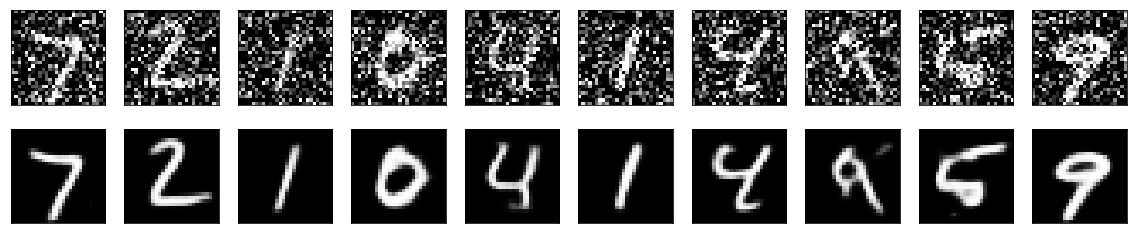

In [35]:
decoded_imgs = autoencoder_noisy.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('./Result_mnist/5-noisy_autoencoder_MEAN_' + str(decoded_imgs.mean())[:4]+'.jpg')
plt.show()